# Classes and data generation

Classes can be manipulated in very different ways. This is very useful when handling data from different source with different properties.

Here an example on how to generate data in classes, and work on the data directly via their classes. 

## Exercise: make a 2D random data plot and one with noise around a linear function

#### My solution

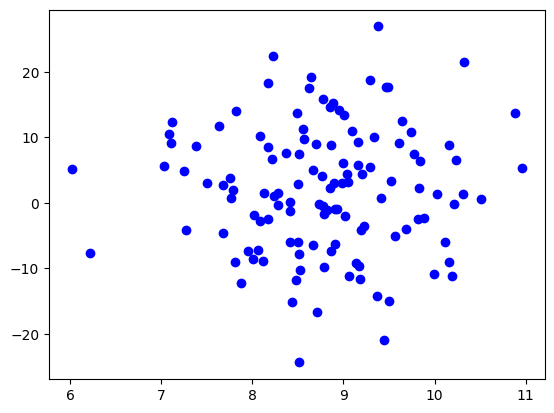

In [1]:
# Random 2D data 

import numpy as np
import matplotlib.pyplot as plt

distribution = 'normal'
n_points = 123
x_range = [1, 10] 
y_range = [1, 10] 

x_scale = x_range[1] - x_range[0]
y_scale = y_range[1] - y_range[0]

if distribution == 'normal':
    x = np.random.randn(n_points) 
else:
    x = np.random.rand(n_points) 

x += x_scale
x *= x_range[0]


if distribution == 'normal':
    y = np.random.randn(n_points) 
else:
    y = np.random.rand(n_points) 

y *= y_scale
y += y_range[0]


# Plot all
plt.scatter(x, y, color='blue', label='Data Points')
plt.show()


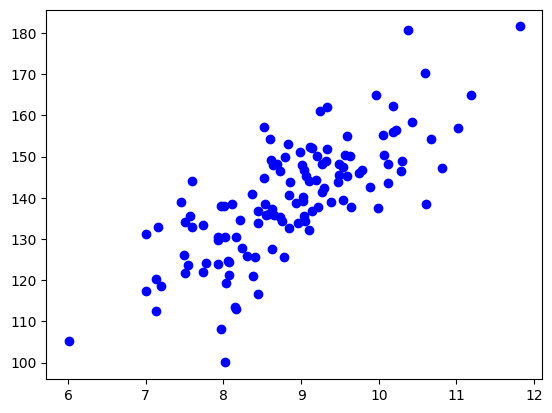

In [2]:
# With a linear function

import numpy as np
import matplotlib.pyplot as plt

distribution = 'normal'
n_points = 123
x_range = [1, 10] 
y_range = [1, 10] 

x_scale = x_range[1] - x_range[0]
y_scale = y_range[1] - y_range[0]

if distribution == 'normal':
    x = np.random.randn(n_points) 
else:
    x = np.random.rand(n_points) 

x += x_scale
x *= x_range[0]


if distribution == 'normal':
    y = np.random.randn(n_points) 
else:
    y = np.random.rand(n_points) 

y *= y_scale
y += y_range[0]

# Add 'perfect' data
true_slope,  true_intercept = 10, 50
y += true_slope * x + true_intercept

# Plot all
plt.scatter(x, y, color='blue', label='Data Points')
plt.show()


## Exercise: Let's make it more pythonic with fuctions

#### My solution

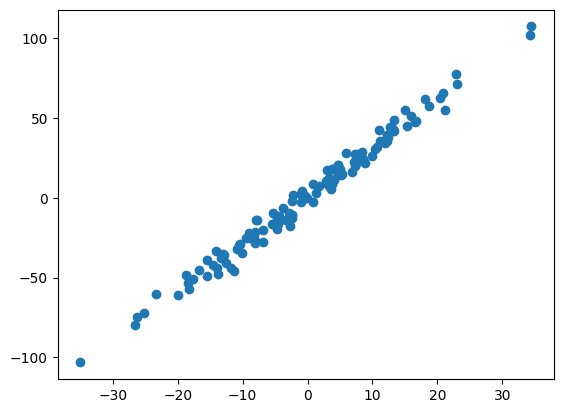

3


In [3]:

x_distribution = 'normal'
y_distribution = 'normal'
n_points = 123
x_range = [0, 13] 
y_range = [0, 4]  
true_slope,  true_intercept = 3, 1


def make_distribution(n_points, range, distribution='normal'):
    if distribution == 'normal':
        xy = np.random.randn(n_points) 
    else:
        xy = np.random.rand(n_points)  

    xy *= (range[1] - range[0]) 
    xy += range[0]
    return xy
    
def make_any_data(x_range, y_range, true_slope,  true_intercept, x_distribution, y_distribution):
    x = make_distribution(n_points, x_range, x_distribution) 
    y = make_distribution(n_points, y_range, y_distribution) 
    y += true_slope*x 
    y += true_intercept
    return x, y

x, y = make_any_data(x_range, y_range, true_slope,  true_intercept, x_distribution, y_distribution)
plt.scatter(x, y)
plt.show()

print(true_slope)

## Exercise: Let's be even more pythonic now, keep the data and the functions inside a class

#### My solution

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def make_distribution(n_points, range, distribution='normal'):
    if distribution == 'normal':
        data = np.random.randn(n_points) 
    else:
        data = np.random.rand(n_points)  

    data *= (range[1] - range[0]) 
    data += range[0]
    return data
    
   
class Data_generator():
    def __init__(self, description='Data generator', data_settings={}):
        self.description = description
        self.n_points = data_settings.get('n_points')
        self.x_range = data_settings.get('x_range', [-1, 1])
        self.y_range = data_settings.get('y_range',  [-1, 1])
        self.true_slope = data_settings.get('true_slope', 0)
        self.true_intercept = data_settings.get('true_intercept', 0)
        
        self.data = None
    
    def generate_data(self, x_distribution='not_normal', y_distribution='not_normal'):    

        x = make_distribution(self.n_points, self.x_range, x_distribution) 
        y = make_distribution(self.n_points, self.y_range, y_distribution) 
            
        # Add 'perfect' data 
        y += self.true_slope * x + self.true_intercept
                
        self.data = [x, y]
        
        return self.data

    def plot_me(self):
        plt.scatter(self.data[0], self.data[1])
        
    def __add__(self, data_class):
        self.data = np.append(self.data[0], data_class.data[0]), np.append(self.data[1], data_class.data[1])
        return self.data
        
    def __str__(self):
        return f'Class {self.description} for 2D data' 

In [20]:
settings = {'n_points':  100, 'x_range': [ -366,  433], 'y_range': [  16,  433], 'true_slope':  19, 'true_intercept': 10}
myclass = Data_generator(data_settings=settings)
settings['true_slope'] = -19
myclass2 = Data_generator(data_settings=settings) 

myclass.generate_data()
myclass2.generate_data()
print(myclass)

Class Data generator for 2D data


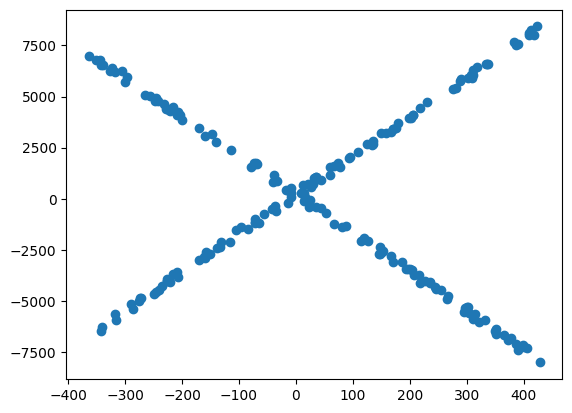

In [21]:
# Summing classes
x, y = myclass + myclass2

plt.scatter(x, y)
plt.show()

## Exercise: Add different data coming from different distributions

### My solution

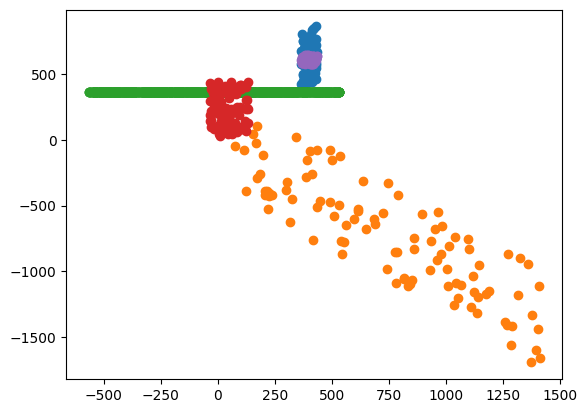

In [143]:
## More elegant?
data_settings = [{'n_points':  100, 'x_range': [ 366,  433], 'y_range': [  16,  433], 'true_slope':  1, 'true_intercept': 10},
                 {'n_points':  100, 'x_range': [  66, 1433], 'y_range': [-366,  433], 'true_slope': -1, 'true_intercept': 10},
                 {'n_points': 1000, 'x_range': [-566,  533], 'y_range': [ 366,  366], 'true_slope':  0, 'true_intercept':  0},
                 {'n_points':  100, 'x_range': [ -36,  133], 'y_range': [   6,  433], 'true_slope':  0, 'true_intercept': 10},
                 {'n_points':  100, 'x_range': [ 366,  433], 'y_range': [ 566,  633], 'true_slope':  0, 'true_intercept': 10}]
 
for i, i_class in enumerate([myclass0, myclass1, myclass2, myclass3, myclass4]): 
    i_class = Data_generator(data_settings=data_settings[i])
    i_class.generate_data()
    i_class.plot_me()
